<a href="https://colab.research.google.com/github/CarrenP/datamining/blob/main/Week_7_Responsi_Carren.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name - NIM**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Load Dataset

In [6]:
bank = pd.read_csv('https://raw.githubusercontent.com/CarrenP/files/refs/heads/main/Bank.csv', delimiter=";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


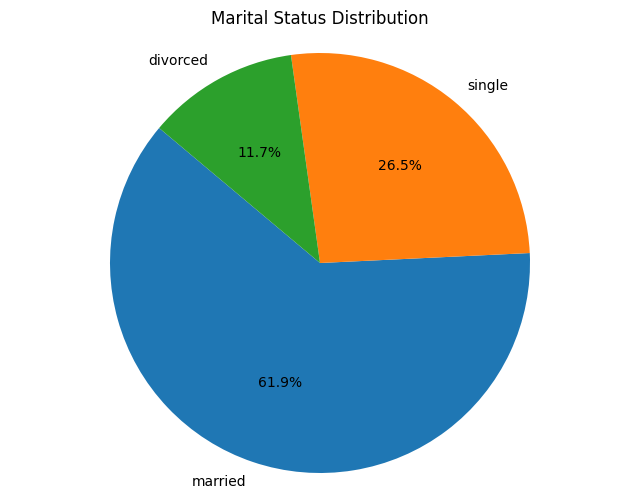

In [8]:
marital_counts = bank['marital'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Marital Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

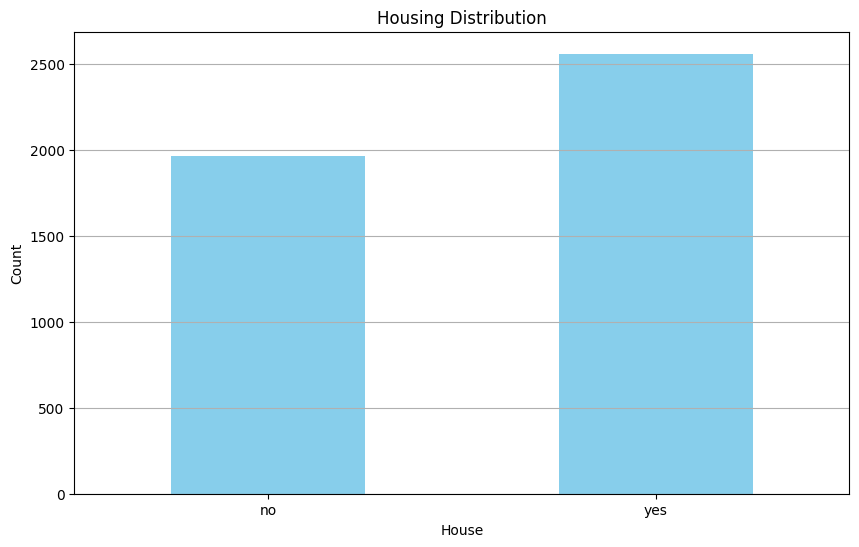

In [9]:
plt.figure(figsize=(10, 6))
bank['housing'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Housing Distribution')
plt.xlabel('House')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [10]:
unique_counts = bank.nunique()
print("Unique value counts per column:\n", unique_counts)

Unique value counts per column:
 age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64


In [11]:
bank['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [12]:
# untuk mengetahui unique value beserta jumlahnya
for col in bank:
    print(f"Value counts for {col}:")
    print(bank[col].value_counts())
    print("\n")

Value counts for age:
age
34    231
32    224
31    199
36    188
33    186
     ... 
68      2
87      1
81      1
86      1
84      1
Name: count, Length: 67, dtype: int64


Value counts for job:
job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64


Value counts for marital:
marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64


Value counts for education:
education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64


Value counts for default:
default
no     4445
yes      76
Name: count, dtype: int64


Value counts for balance:
balance
0       357
2        24
1        15
4        13
5        11
       ... 
539       1
1041      1
464       1
7702      1
1137      1
Name: count, Le

In [13]:
# Combine 'admin' and 'management' under a single category
bank['job'] = bank['job'].replace({'admin.': 'admin/management', 'management': 'admin/management'})

# Verify the change
print(bank['job'].value_counts())

job
admin/management    1447
blue-collar          946
technician           768
services             417
retired              230
self-employed        183
entrepreneur         168
unemployed           128
housemaid            112
student               84
unknown               38
Name: count, dtype: int64


In [14]:
for column in bank.columns:
    if column != 'poutcome':
        if 'unknown' in bank[column].values:
            # Get the mode of the column
            mode_value = bank[column].mode()[0]
            # Replace 'unknown' with the mode
            bank[column] = bank[column].replace('unknown', mode_value)

In [15]:
print((bank == 'unknown').sum())

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64


## Machine Learning (Split Data)

In [16]:
# Verify the change
print(bank['job'].value_counts())

job
admin/management    1485
blue-collar          946
technician           768
services             417
retired              230
self-employed        183
entrepreneur         168
unemployed           128
housemaid            112
student               84
Name: count, dtype: int64


In [17]:
# untuk mengubah kolom kategorikal (workclass, education, dll) menjadi numerik
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# untuk identifikasi dan memilih semua kolom kategorikal
categorical_columns = bank.select_dtypes(include=['object']).columns

# untuk mengonversi setiap kolom kategorikal ke numerik
for col in categorical_columns:
    bank[col] = label_encoder.fit_transform(bank[col])

# untuk menampilkan 10 data random
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,9,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,6,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,0,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,0,1,2,0,1476,1,1,0,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,0,5,8,226,1,-1,0,3,0


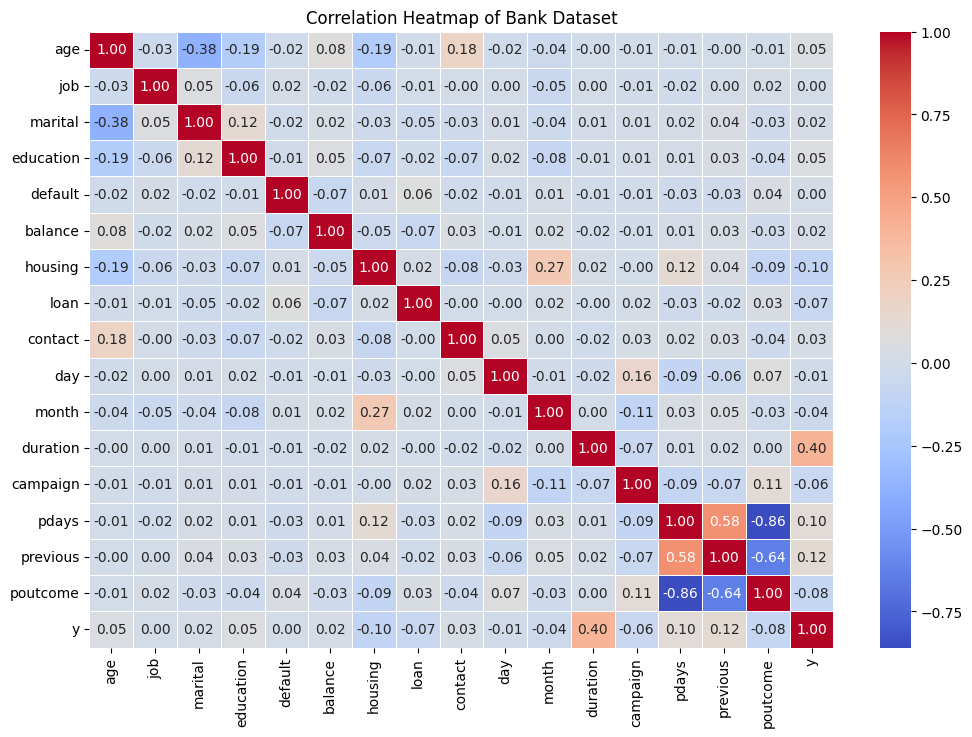

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'bank' is your DataFrame with encoded values

# Compute the correlation matrix
correlation_matrix = bank.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Display the plot
plt.title("Correlation Heatmap of Bank Dataset")
plt.show()

In [19]:
X = bank.drop(columns=['duration','pdays', 'previous'])
y = bank['y']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3616, 14)
X_test shape: (905, 14)
y_train shape: (3616,)
y_test shape: (905,)


## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [21]:
# a. define the model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# b. Predict test result
y_pred = model.predict(X_test)

In [23]:
# c. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 1.0


In [24]:
# d. Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[807   0]
 [  0  98]]


In [25]:
# e. Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       807
           1       1.00      1.00      1.00        98

    accuracy                           1.00       905
   macro avg       1.00      1.00      1.00       905
weighted avg       1.00      1.00      1.00       905



In [26]:
# print the scores on training and test set
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
print('Training set score: {:.4f}'.format(rf_clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(rf_clf.score(X_test,y_test)))

Training set score: 1.0000
Test set score: 1.0000


In [27]:
# f. Results and conclusion

print("The Random Forest model achieved an accuracy score of", accuracy)

The Random Forest model achieved an accuracy score of 1.0


setelah di imbalance

In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# a. Define and fit the model on the resampled data
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# b. Predict the test set results
y_pred = model.predict(X_test)

# c. Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# d. Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# e. Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# f. Print the scores on training and test set for comparison
print('Training set score: {:.4f}'.format(model.score(X_resampled, y_resampled)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

# g. Results and conclusion
print("The Random Forest model after imbalance achieved an accuracy score of", accuracy)


Accuracy Score: 1.0
Confusion Matrix:
 [[807   0]
 [  0  98]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       807
           1       1.00      1.00      1.00        98

    accuracy                           1.00       905
   macro avg       1.00      1.00      1.00       905
weighted avg       1.00      1.00      1.00       905

Training set score: 1.0000
Test set score: 1.0000
The Random Forest model after imbalance achieved an accuracy score of 1.0


## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# a. Define the Gradient Boosting model
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# b. Predict the test set results
y_pred = model.predict(X_test)

# c. Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# d. Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# e. Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Print the scores on training and test sets for comparison
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
print('Training set score: {:.4f}'.format(gb_clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gb_clf.score(X_test, y_test)))

# f. Results and conclusion
print("The Gradient Boosting model achieved an accuracy score of", accuracy)

Accuracy Score: 1.0
Confusion Matrix:
 [[807   0]
 [  0  98]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       807
           1       1.00      1.00      1.00        98

    accuracy                           1.00       905
   macro avg       1.00      1.00      1.00       905
weighted avg       1.00      1.00      1.00       905

Training set score: 1.0000
Test set score: 1.0000
The Gradient Boosting model achieved an accuracy score of 1.0


In [30]:
from sklearn.utils import resample
data_combined = pd.concat([X, y], axis=1)
new_columns = []
for i, col in enumerate(data_combined.columns):
    if col in new_columns:
        new_columns.append(f"{col}_{i}")  # Append index to duplicate column names
    else:
        new_columns.append(col)
data_combined.columns = new_columns

majority_class = data_combined[data_combined['y'] == 0]
minority_class = data_combined[data_combined['y'] == 1]

# Downsample majority class to match minority class
majority_class_downsampled = resample(
    majority_class,
    replace=False,
    n_samples=len(minority_class),
    random_state=42
)

# Combine minority class with downsampled majority class
imbalanced_data = pd.concat([majority_class_downsampled, minority_class])

X_imbalanced = imbalanced_data.drop(columns=['y'])
y_imbalanced = imbalanced_data['y']

X_train, X_test, y_train, y_test = train_test_split(
    X_imbalanced, y_imbalanced, test_size=0.2, random_state=42
)

# a. Define the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# b. Predict test set results
y_pred = gb_model.predict(X_test)

# c. Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# d. Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# e. Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Print scores on training and test set
print('Training set score: {:.4f}'.format(gb_model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gb_model.score(X_test, y_test)))

# f. Results and conclusion
print("The Gradient Boosting model after imbalance achieved an accuracy score of", accuracy)

Accuracy Score: 1.0
Confusion Matrix:
 [[111   0]
 [  0  98]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00        98

    accuracy                           1.00       209
   macro avg       1.00      1.00      1.00       209
weighted avg       1.00      1.00      1.00       209

Training set score: 1.0000
Test set score: 1.0000
The Gradient Boosting model after imbalance achieved an accuracy score of 1.0
